# Player Retention & A/B Test Analysis (Cookie Cats)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Load Dataset

In [4]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Dataset Overview

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


## Data Quality Checks

In [5]:
df.isnull().sum()
df['userid'].nunique()
df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

## Player Engagement Analysis

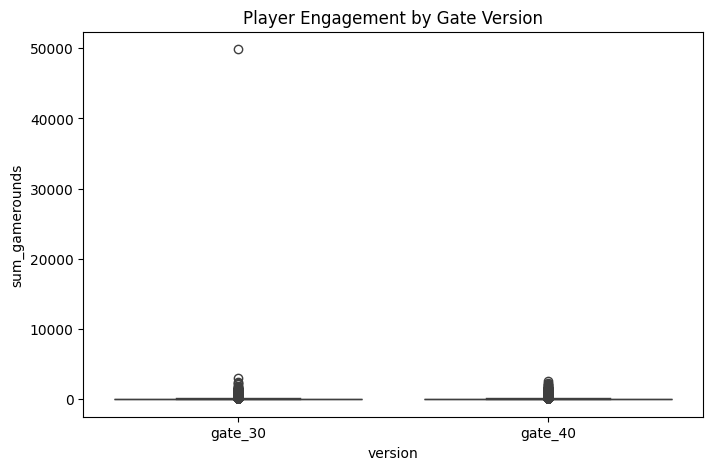

In [6]:
df.groupby('version')['sum_gamerounds'].mean()

plt.figure(figsize=(8,5))
sns.boxplot(x='version', y='sum_gamerounds', data=df)
plt.title('Player Engagement by Gate Version')
plt.show()

## Retention Analysis

In [7]:
df.groupby('version')['retention_1'].mean()
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

## A/B Test (Chi-Square)

In [8]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['version'], df['retention_7'])
chi2, p, dof, expected = chi2_contingency(contingency)
p

np.float64(0.0016005742679058301)

## Business Insights & Recommendation


- Player engagement is comparable across both gate versions, with gate_40 showing better Day-7 retention.
- Recommend moving progression gate to level 40 to improve long-term retention.